In [19]:
import geopandas as gpd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import shapely.wkt
import shapely.geometry
import pandas as pd
import shapely.geometry.multipolygon as sh
import rioxarray

In [20]:
slp = rioxarray.open_rasterio('Data\\tha_slope\\tha_slp_int\\w001001.adf',masked=True)
xr_slp = slp.coarsen(x = 3, y= 3, boundary='pad').mean()
xr_slp = xr_slp.sel(band = 1)
xr_slp = xr_slp.drop_vars('band')
xr_slp = xr_slp.drop('spatial_ref', dim=None)
xr_slp = xr_slp.rename({'x':'lon'})
xr_slp = xr_slp.rename({'y':'lat'})
xr_slp = xr_slp.to_dataset(name='slp')
df_slp = xr_slp.to_dataframe()
df_slp.reset_index(inplace=True)
df_slp = gpd.GeoDataFrame(df_slp, geometry =gpd.points_from_xy(df_slp['lon'],df_slp['lat']))
df_slp.crs = {'init': 'epsg:4326'}
print(df_slp['slp'].max())
df_slp['slp']= df_slp['slp'].fillna(100)


59.22222137451172


C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [21]:
xr_landuse_suitability_index = xr.open_dataset('Output\\xr_SI_Landcover.nc')
df_slope_suitability_index = xr_landuse_suitability_index.to_dataframe()
df_slope_suitability_index.reset_index(inplace=True)
df_slope_suitability_index = gpd.GeoDataFrame(df_slope_suitability_index, geometry =gpd.points_from_xy(df_slope_suitability_index['lon'],df_slope_suitability_index['lat']))
df_slope_suitability_index.crs = {'init': 'epsg:4326'}
df_slope_suitability_index['SI_BGEC'] = 0
df_slope_suitability_index['SI_Biomass'] = 0
df_slope_suitability_index['SI_Solar'] = 0
df_slope_suitability_index['SI_Wind'] = 0
df_slope_suitability_index['SI_BGWW'] = 0
df_slope_suitability_index['SI_MSW'] = 0
df_slope_suitability_index['SI_IEW'] = 0

C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [22]:
df_slope_suitability_index = gpd.sjoin_nearest(df_slope_suitability_index,df_slp,how='left')

for i in df_slope_suitability_index.columns:
    if i not in (['lon_left','lat_left','geometry','slp','SI_BGEC','SI_Biomass','SI_Solar','SI_Wind','SI_BGWW','SI_MSW','SI_IEW']):
        df_slope_suitability_index = df_slope_suitability_index.drop(columns=i)

df_slope_suitability_index = df_slope_suitability_index.rename(columns= {'lon_left' : 'lon'})
df_slope_suitability_index = df_slope_suitability_index.rename(columns= {'lat_left' : 'lat'})
df_slope_suitability_index['slp']= df_slope_suitability_index['slp'].fillna(100)

print(df_slope_suitability_index)

C:\Users\basna\AppData\Roaming\Python\Python311\site-packages\geopandas\array.py:364: UserWarning: Geometry is in a geographic CRS. Results from 'sjoin_nearest' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  warnings.warn(


                lat         lon  SI_BGEC  SI_Biomass  SI_Solar  SI_Wind  \
0          5.615278   97.345833        0           0         0        0   
1          5.615278   97.348611        0           0         0        0   
2          5.615278   97.351389        0           0         0        0   
3          5.615278   97.354167        0           0         0        0   
4          5.615278   97.356944        0           0         0        0   
...             ...         ...      ...         ...       ...      ...   
15957805  20.462500  105.623611        0           0         0        0   
15957806  20.462500  105.626389        0           0         0        0   
15957807  20.462500  105.629167        0           0         0        0   
15957808  20.462500  105.631944        0           0         0        0   
15957809  20.462500  105.634722        0           0         0        0   

          SI_BGWW  SI_MSW  SI_IEW                    geometry    slp  
0               0       0   

In [23]:
## SI_BGEC ##
df_slope_suitability_index['SI_BGEC'].loc[df_slope_suitability_index['slp'] > 15] = 0
df_slope_suitability_index['SI_BGEC'].loc[(df_slope_suitability_index['slp'] > 5) & (df_slope_suitability_index['slp'] <= 15)] = 2
df_slope_suitability_index['SI_BGEC'].loc[df_slope_suitability_index['slp'] <= 5 ] = 3

## SI_Biomass ##
df_slope_suitability_index['SI_Biomass'].loc[df_slope_suitability_index['slp'] > 15] = 0
df_slope_suitability_index['SI_Biomass'].loc[(df_slope_suitability_index['slp'] > 5) & (df_slope_suitability_index['slp'] <= 15)] = 2
df_slope_suitability_index['SI_Biomass'].loc[df_slope_suitability_index['slp'] <= 5 ] = 3

## SI for Solar ##
df_slope_suitability_index['SI_Solar'].loc[df_slope_suitability_index['slp'] > 5] = 0
df_slope_suitability_index['SI_Solar'].loc[(df_slope_suitability_index['slp'] > 1) & (df_slope_suitability_index['slp'] <= 5)] =2
df_slope_suitability_index['SI_Solar'].loc[df_slope_suitability_index['slp'] <=1 ] = 3

## SI_Wind ##
df_slope_suitability_index['SI_Wind'].loc[df_slope_suitability_index['slp'] > 15] = 0
df_slope_suitability_index['SI_Wind'].loc[(df_slope_suitability_index['slp'] > 7) & (df_slope_suitability_index['slp'] <= 15)] =2
df_slope_suitability_index['SI_Wind'].loc[df_slope_suitability_index['slp'] <= 7 ] = 3

## SI_BGWW ##
df_slope_suitability_index['SI_BGWW'].loc[df_slope_suitability_index['slp'] > 15] = 0
df_slope_suitability_index['SI_BGWW'].loc[(df_slope_suitability_index['slp'] > 10) & (df_slope_suitability_index['slp'] <= 15)] = 1
df_slope_suitability_index['SI_BGWW'].loc[(df_slope_suitability_index['slp'] > 5) & (df_slope_suitability_index['slp'] <= 10)] = 2
df_slope_suitability_index['SI_BGWW'].loc[df_slope_suitability_index['slp'] <= 5 ] = 3

## SI_MSW ##
df_slope_suitability_index['SI_MSW'].loc[df_slope_suitability_index['slp'] > 15] = 0
df_slope_suitability_index['SI_MSW'].loc[(df_slope_suitability_index['slp'] > 10) & (df_slope_suitability_index['slp'] <= 15)] = 1
df_slope_suitability_index['SI_MSW'].loc[(df_slope_suitability_index['slp'] > 5) & (df_slope_suitability_index['slp'] <= 10)] = 2
df_slope_suitability_index['SI_MSW'].loc[df_slope_suitability_index['slp'] <= 5 ] = 3

## SI_IEW ##
df_slope_suitability_index['SI_IEW'].loc[df_slope_suitability_index['slp'] > 15] = 0
df_slope_suitability_index['SI_IEW'].loc[(df_slope_suitability_index['slp'] > 10) & (df_slope_suitability_index['slp'] <= 15)] = 1
df_slope_suitability_index['SI_IEW'].loc[(df_slope_suitability_index['slp'] > 5) & (df_slope_suitability_index['slp'] <= 10)] = 2
df_slope_suitability_index['SI_IEW'].loc[df_slope_suitability_index['slp'] <= 5 ] = 3

print(df_slope_suitability_index)

C:\Users\basna\AppData\Local\Temp\ipykernel_24664\3956120685.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slope_suitability_index['SI_BGEC'].loc[df_slope_suitability_index['slp'] > 15] = 0
C:\Users\basna\AppData\Local\Temp\ipykernel_24664\3956120685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slope_suitability_index['SI_BGEC'].loc[(df_slope_suitability_index['slp'] > 5) & (df_slope_suitability_index['slp'] <= 15)] = 2
C:\Users\basna\AppData\Local\Temp\ipykernel_24664\3956120685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the d

                lat         lon  SI_BGEC  SI_Biomass  SI_Solar  SI_Wind  \
0          5.615278   97.345833        0           0         0        0   
1          5.615278   97.348611        0           0         0        0   
2          5.615278   97.351389        0           0         0        0   
3          5.615278   97.354167        0           0         0        0   
4          5.615278   97.356944        0           0         0        0   
...             ...         ...      ...         ...       ...      ...   
15957805  20.462500  105.623611        0           0         0        0   
15957806  20.462500  105.626389        0           0         0        0   
15957807  20.462500  105.629167        0           0         0        0   
15957808  20.462500  105.631944        0           0         0        0   
15957809  20.462500  105.634722        0           0         0        0   

          SI_BGWW  SI_MSW  SI_IEW                    geometry    slp  
0               0       0   

C:\Users\basna\AppData\Local\Temp\ipykernel_24664\3956120685.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slope_suitability_index['SI_IEW'].loc[(df_slope_suitability_index['slp'] > 5) & (df_slope_suitability_index['slp'] <= 10)] = 2
C:\Users\basna\AppData\Local\Temp\ipykernel_24664\3956120685.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slope_suitability_index['SI_IEW'].loc[df_slope_suitability_index['slp'] <= 5 ] = 3


In [24]:
df_slope_suitability_index.reset_index(inplace=True)

try: 
    df_slope_suitability_index = df_slope_suitability_index.drop(columns=['geometry'])
except:
    None

df_slope_suitability_index = df_slope_suitability_index.groupby(['lat', 'lon']).agg('mean')
df_slope_suitability_index.reset_index(inplace=True)
df_slope_suitability_index = df_slope_suitability_index.set_index(['lat', 'lon'])
try: 
    df_slope_suitability_index = df_slope_suitability_index.drop(columns=['index','slp'])
except:
    df_slope_suitability_index = df_slope_suitability_index.drop(columns=['slp'])

xr_slope_suitability_index = xr.Dataset.from_dataframe(df_slope_suitability_index)
xr_slope_suitability_index.to_netcdf(path='Output\\xr_SI_Slope.nc')
print(xr_slope_suitability_index)


<xarray.Dataset>
Dimensions:     (lat: 5346, lon: 2985)
Coordinates:
  * lat         (lat) float64 5.615 5.618 5.621 5.624 ... 20.46 20.46 20.46
  * lon         (lon) float64 97.35 97.35 97.35 97.35 ... 105.6 105.6 105.6
Data variables:
    SI_BGEC     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Biomass  (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Solar    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_Wind     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_BGWW     (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_MSW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    SI_IEW      (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0


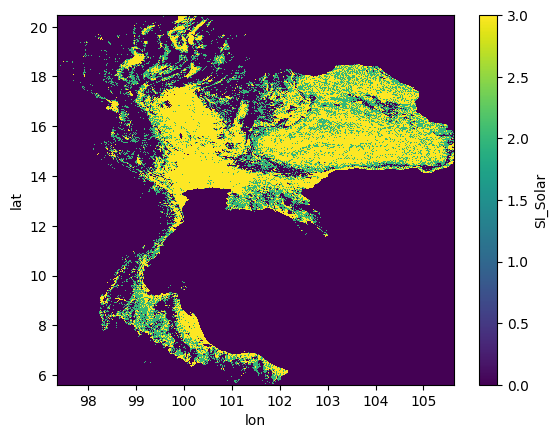

In [25]:
xr_slope_suitability_index['SI_Solar'].plot()

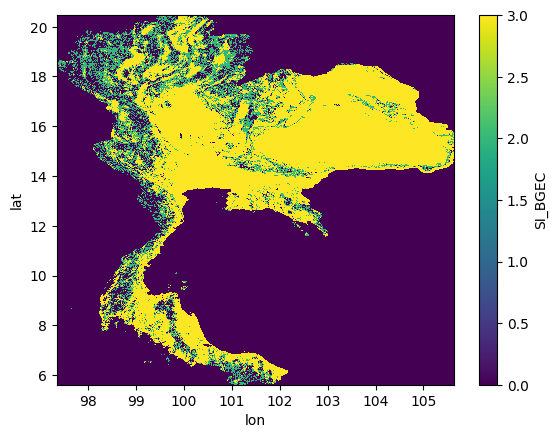

In [26]:
xr_slope_suitability_index['SI_BGEC'].plot()